<a href="https://colab.research.google.com/github/Sriram4-tech/Sales_dashboard/blob/main/Sales_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [7]:
Sales_data = pd.read_csv('/content/sample_data/marketing_data.csv')
Sales = Sales_data.copy()

In [8]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [9]:
Sales.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
Sales.describe(include = 'object')

,Education,Marital_Status,Income,Dt_Customer,Country
count,2240,2240,2216,2240,2240
unique,5,8,1974,663,8
top,Graduation,Married,"$7,500.00",8/31/2012,SP
freq,1127,864,12,12,1095


In [11]:
Sales.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [12]:
Sales.sample()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
31,9264,1986,Graduation,Married,"$79,529.00",0,0,4/27/2014,1,423,42,706,73,197,197,1,4,8,9,2,0,0,0,0,0,0,0,CA


In [13]:
Sales.isnull().sum()/len(Sales)*100

,0
ID,0.000000
Year_Birth,0.000000
Education,0.000000
Marital_Status,0.000000
Income,1.071429
Kidhome,0.000000
Teenhome,0.000000
Dt_Customer,0.000000
Recency,0.000000
MntWines,0.000000


In [14]:
Sales.dropna(inplace = True)

In [15]:
Sales[' Income '] = Sales[' Income '].str.replace('$','')
Sales[' Income '] = Sales[' Income '].str.replace(',','')
Sales[' Income '] = Sales[' Income '].astype(float)

In [16]:
Sales['Age'] = Sales['Year_Birth'].apply(lambda x: 2025 -x)
Sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4    Income              2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [17]:
Sales.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,55
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,64
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,67
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,58
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,36


To calculate the amount spent and corresponding percentage for each product category

In [18]:
Sales['Total_amt_spent'] = np.sum(Sales.filter(regex = 'Mnt'), axis=1)
Sales['Total_purchases'] = np.sum(Sales.filter(regex = 'Num'), axis = 1)

In [19]:
Sales['MntWines']/Sales['Total_amt_spent']*100
Sales['MntFruits']/Sales['Total_amt_spent']*100
Sales['MntMeatProducts']/Sales['Total_amt_spent']*100
Sales['MntFishProducts']/Sales['Total_amt_spent']*100
Sales['MntSweetProducts']/Sales['Total_amt_spent']*100
Sales['MntGoldProds']/Sales['Total_amt_spent']*100



,0
0,18.319328
1,6.412478
2,11.952191
3,0.000000
4,37.362637
...,...
2235,11.320755
2236,29.090909
2237,4.530744
2238,4.555315


In [20]:
Sales['NumDealsPurchases']/Sales['Total_purchases']*100
Sales['NumWebPurchases']/Sales['Total_purchases']*100
Sales['NumCatalogPurchases']/Sales['Total_purchases']*100
Sales['NumStorePurchases']/Sales['Total_purchases']*100
Sales['NumWebVisitsMonth']/Sales['Total_purchases']*100

,0
0,6.250000
1,21.739130
2,15.384615
3,63.636364
4,46.666667
...,...
2235,16.666667
2236,61.538462
2237,36.363636
2238,13.043478


In [21]:
Cmp = Sales.filter(regex = 'Cmp').sum()
print(Cmp)

AcceptedCmp3    163
AcceptedCmp4    164
AcceptedCmp5    162
AcceptedCmp1    142
AcceptedCmp2     30
dtype: int64


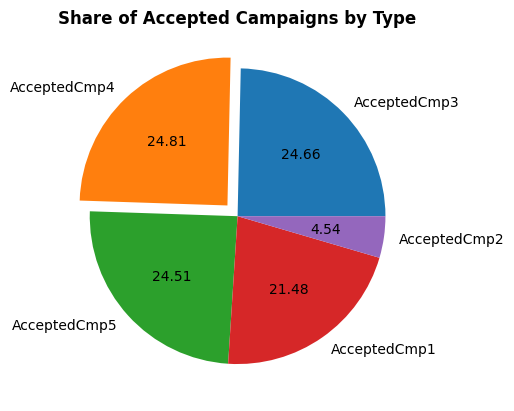

In [22]:
plt.pie(Cmp,explode = [0,0.1,0,0,0],labels =Cmp.index,autopct = '%.2f')
plt.title('Share of Accepted Campaigns by Type',loc = 'center',fontweight = 'bold')
plt.show()

In [23]:
Product = Sales.filter(regex= 'Mnt').sum()
print(Product)

MntWines            676083
MntFruits            58405
MntMeatProducts     370063
MntFishProducts      83405
MntSweetProducts     59896
MntGoldProds         97427
dtype: int64


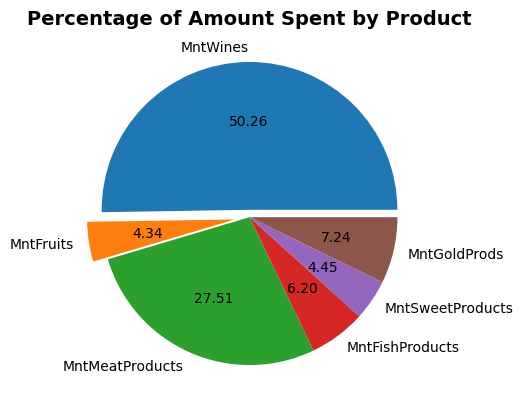

In [24]:
plt.pie(Product, explode = [0.05,0.1,0,0,0,0], labels = Product.index, autopct = '%.2f')
plt.title('Percentage of Amount Spent by Product', loc='center', fontweight='bold', fontsize=14)
plt.show()

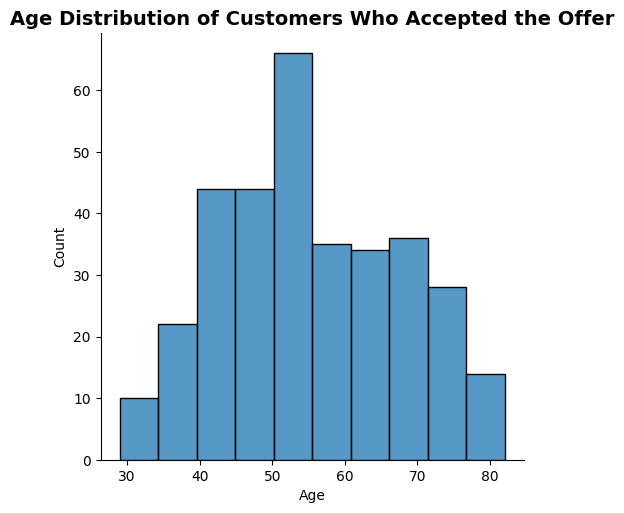

In [25]:
customers_accepted = Sales[Sales['Response'] == 1]
sns.displot(customers_accepted['Age'])

plt.title('Age Distribution of Customers Who Accepted the Offer', loc='center', fontweight='bold', fontsize=14)
plt.show()


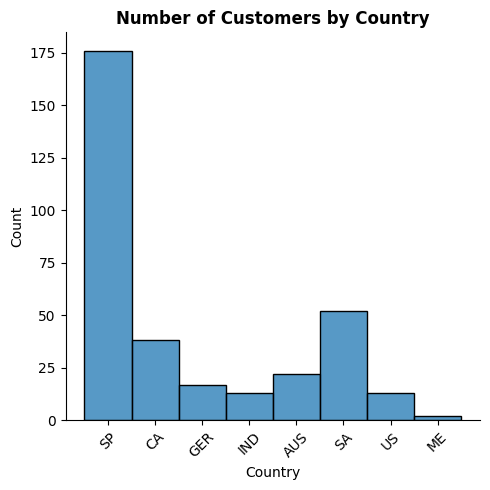

In [26]:
sns.displot(customers_accepted['Country'])
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.title('Number of Customers by Country', fontweight = 'bold')
plt.tight_layout()
plt.show()

In [27]:
Sales.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age,Total_amt_spent,Total_purchases
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.150271,0.009477,56.179603,607.075361,20.199910
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.357417,0.096907,11.985554,602.900476,7.283193
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,5.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,69.000000,14.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,396.500000,19.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,1048.000000,25.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,132.000000,2525.000000,46.000000


In [28]:
Sale_data  = Sales.drop(['ID'],axis=1)
Sale_data = Sale_data.select_dtypes(include = 'number')

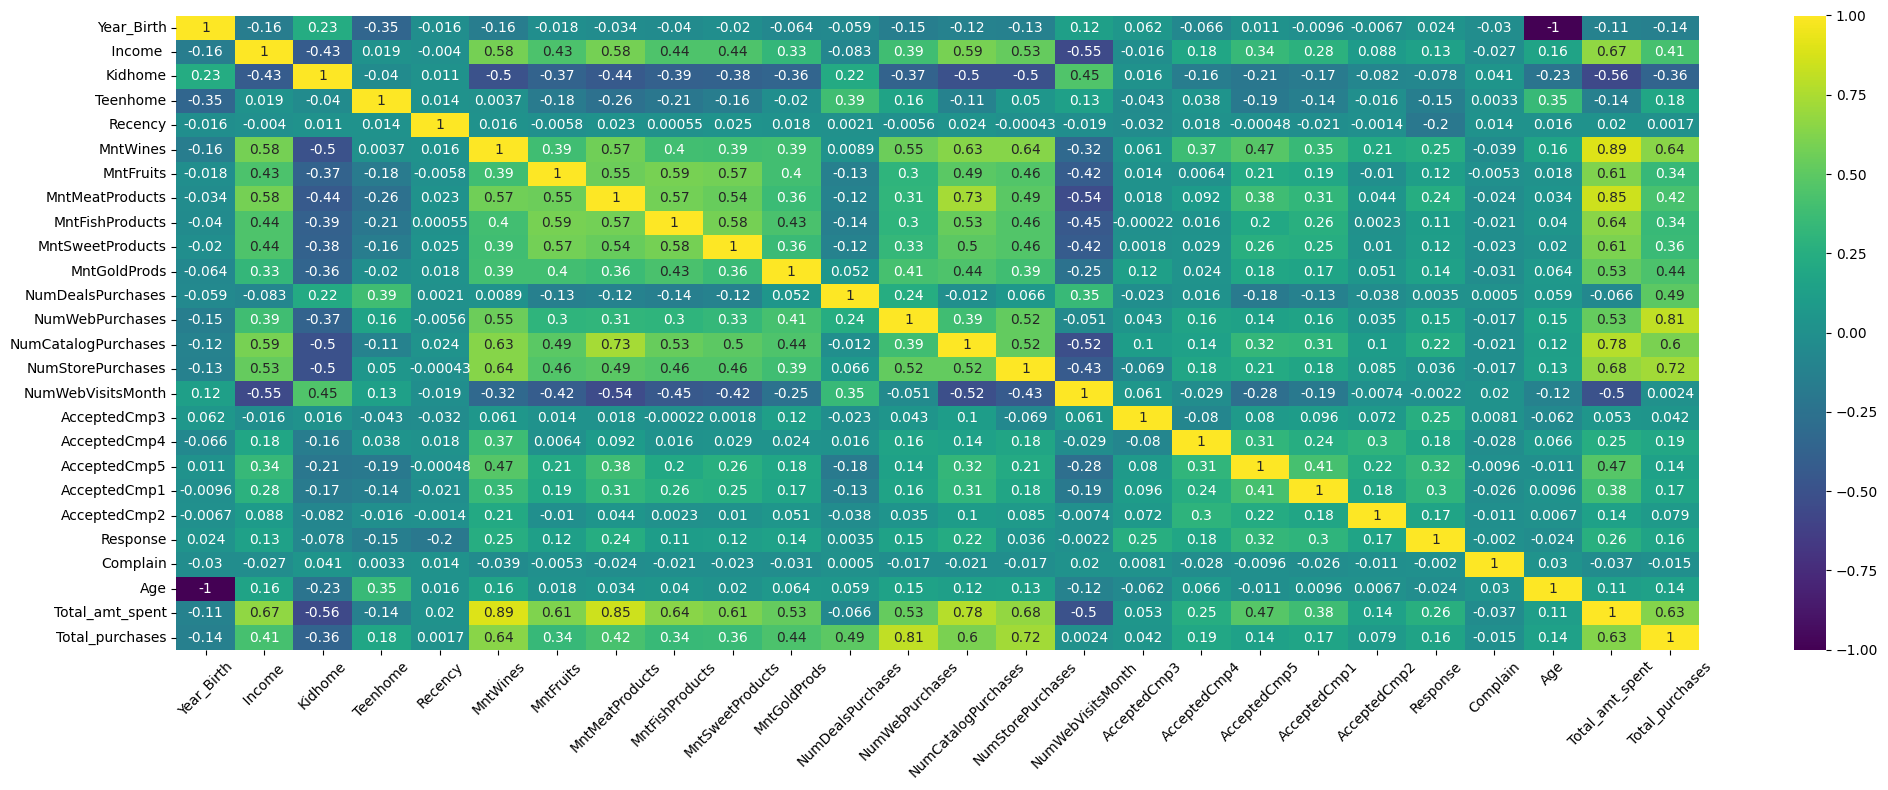

In [29]:
plt.figure(figsize = [21,8])
sns.heatmap(Sale_data.corr(),annot =True, cmap = 'viridis',xticklabels=True, yticklabels=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()